Task:  Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [127]:
df['target'] = wine.target

In [128]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [129]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [130]:
input = df.drop('target', axis=1)
input

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [131]:
target = df['target']
target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2)

In [133]:
# first we will use the naive Bayes classifier of multinomial distribution 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [134]:
mnb.score(X_test, y_test)

0.8333333333333334

In [135]:
from sklearn.model_selection import cross_val_score
cross_val_score(mnb, input, target, cv=5).mean()

np.float64(0.843968253968254)

In [136]:
# now we will use the Gaussian naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [137]:
gnb.score(X_test, y_test)

1.0

In [138]:
cross_val_score(gnb, input, target, cv=5).mean()

np.float64(0.9663492063492063)

In [139]:
gnb.predict([[14.23,	1.71,	2.43,	15.6,	127.0,	2.80,	3.06,	0.28,	2.29,	5.64,	1.04,	3.92,	1065.0]])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [140]:
gnb.predict([[14.13,	4.10,	2.74,	24.5,	96.0,	2.05,	0.76,	0.56,	1.35,	9.20,	0.61,	1.60,	560.0]])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([2])

In [141]:
mnb.predict([[14.23,	1.71,	2.43,	15.6,	127.0,	2.80,	3.06,	0.28,	2.29,	5.64,	1.04,	3.92,	1065.0]])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0])

In [142]:
mnb.predict([[14.13,	4.10,	2.74,	24.5,	96.0,	2.05,	0.76,	0.56,	1.35,	9.20,	0.61,	1.60,	560.0]])

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([2])

Accuracy Test

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array([1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0])

In [144]:
y_test

87     1
112    1
156    2
56     0
32     0
124    1
48     0
159    2
12     0
76     1
130    2
38     0
81     1
58     0
62     1
60     1
122    1
78     1
46     0
157    2
74     1
116    1
17     0
33     0
103    1
5      0
53     0
16     0
165    2
8      0
149    2
7      0
54     0
59     1
119    1
23     0
Name: target, dtype: int64

In [145]:
y_pred_mnb = mnb.predict(X_test)
y_pred_mnb

array([1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0])

In [146]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix (GNB): ")
print(cm_gnb)
clfr_gnb = classification_report(y_test, y_pred_gnb)
print("Classification Report (GNB): ")
print(clfr_gnb)

Confusion Matrix (GNB): 
[[16  0  0]
 [ 0 14  0]
 [ 0  0  6]]
Classification Report (GNB): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [147]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print("Confusion Matrix (MNB): ")
print(cm_mnb)
clfr_mnb = classification_report(y_test, y_pred_mnb)
print("Classification Report (MNB): ")
print(clfr_mnb)

Confusion Matrix (MNB): 
[[16  0  0]
 [ 2  9  3]
 [ 0  1  5]]
Classification Report (MNB): 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.90      0.64      0.75        14
           2       0.62      0.83      0.71         6

    accuracy                           0.83        36
   macro avg       0.80      0.83      0.80        36
weighted avg       0.85      0.83      0.83        36



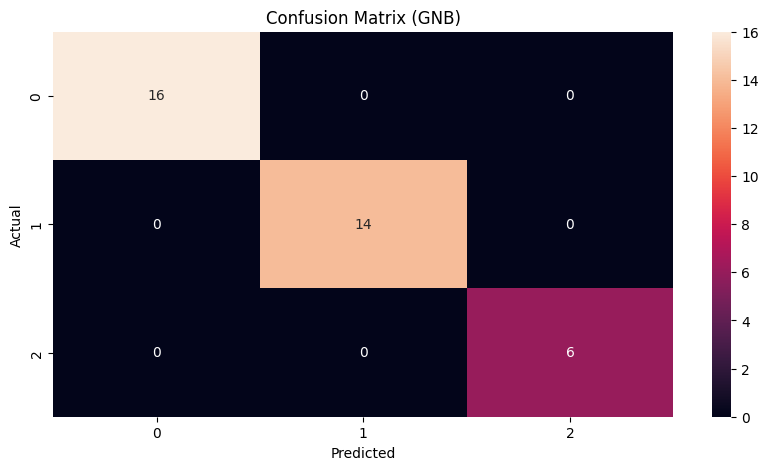

In [148]:
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.heatmap(cm_gnb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (GNB)')
plt.show()

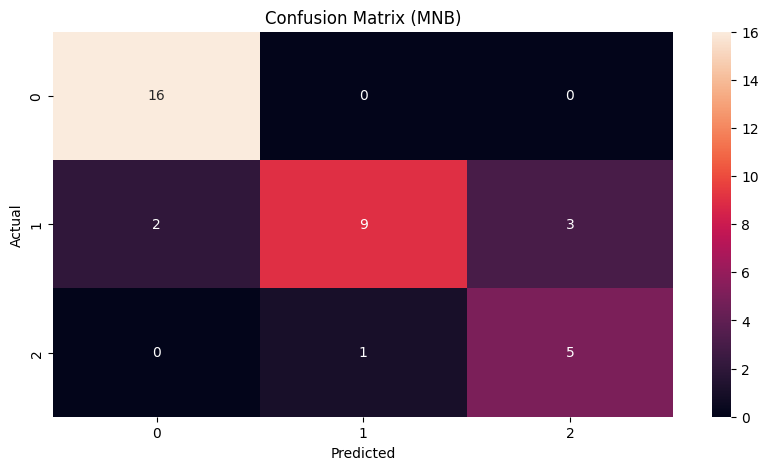

In [149]:
plt.figure(figsize = (10, 5))
sns.heatmap(cm_mnb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MNB)')
plt.show()

Here it is clear that Gaussian Naive Bayes is performing better than Multinominal Naive Bayes